# Machine Listening (Fall 2020)
# Lab6: Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# lab6 - 1 : Single Layer Perceptron from Scratch

Class to create a single layer perceptron

In [19]:
import numpy as np
from numpy import exp, array, random, dot, tanh
  
def sigmoid(x):
  return 1 / (1 +np.exp(-x))

class Network():
    def __init__(self):
      self.w = 2 * random.random((3, 1)) - 1  # 3x1 Weight matrix 
    
    def activation(self,x):
      return sigmoid(x)

    def activation_derivative(self, x):
      return sigmoid(x)*(1-sigmoid(x))

    def forward_propagation(self, x):

        return self.activation(dot(x, self.w))

    # training the network. 
    def train(self, x, y, num_train_iterations,lr):
                                  
        for iteration in range(num_train_iterations): 
            a = self.forward_propagation(x)
            dz = a-y
            dw = dot(x.T, dz * self.activation_derivative(a))
            self.w = self.w - lr*dw


make simple training data

In [20]:
train_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
train_outputs = array([[0, 1, 1, 0]]).T

define and train the model

In [21]:
network = Network() 
print ('Random weights at the start of training') 
print (network.w)

network.train(train_inputs, train_outputs, 10000,0.1)

print ('New weights after training')
print (network.w)

Random weights at the start of training
[[-0.59014898]
 [-0.6783099 ]
 [ 0.16281485]]
New weights after training
[[10.39549271]
 [-0.42049467]
 [-4.9016357 ]]


test the neural network with a new input.


In [22]:
print ("Testing network on new examples ->")
print (network.forward_propagation(array([.02, 0.9, 0])))

Testing network on new examples ->
[0.45746919]


# lab6 - 2 : Neural Network with One Hidden Layer from Scratch

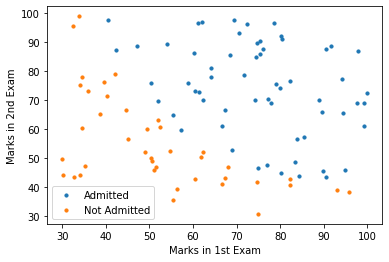

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

path = './data/data_classification.txt'

data = pd.read_csv(path, header=None)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

admitted = data.loc[y == 1]

not_admitted = data.loc[y == 0]

    # plots
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

X = X.T
y = y.T
X = X.to_numpy()
y = y.to_numpy()
y = [y]
y = np.array(y)



Class to create a neural network with one hidden layer

In [45]:
import numpy as np
  
def sigmoid(x):
  return 1 / (1 +np.exp(-x))

class NeuralNetwork(object):
    def __init__(self, layers):
        self.layers = layers
        self.w = [] # weights
        self.b = [] # biases
        # initialize weights and bias with random value
        np.random.seed(1)
        for i in range(len(layers)-1):
            self.w.append(np.random.randn(layers[i+1], layers[i]))
            self.b.append(np.random.randn(layers[i+1], 1))

    def activation(self,x):
      return sigmoid(x)

    def activation_derivative(self, x):
      return sigmoid(x)*(1-sigmoid(x))

    def forward_propagation(self, x):
        # return the feedforward value for x
        a = np.copy(x)
        z_s = [] # feedforward before activaiton
        a_s = [a] # feedforward after activaiton
        for i in range(len(self.w)):
            print(self.w[i].shape)
            print(a.shape)
            print(self.b[i].shape)
            z_s.append(self.w[i].dot(a) + self.b[i])
            a = self.activation(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)

    def backpropagation(self,y, z_s, a_s):
        dw = [] # derivitives respect to biases
        db = [] # derivitives respect to weight
        dz = [None] * len(self.w) # deltas

        # insert the last layer error
        dz[-1] = (a_s[-1]-y)

        # Perform BackPropagation
        for i in reversed(range(len(dz)-1)):
            da = self.w[i+1].T.dot(dz[i+1])
            dz[i] = da*self.activation_derivative(z_s[i])
        
        batch_size = y.shape[1]
        db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in dz]
        dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(dz)]
        return dw, db


    def train(self, x, y, batch_size, epochs, lr):
        for e in range(epochs):
            i=0
            while(i<len(y)):
                x_batch = x[i:i+batch_size]
                print('x_batch')
                print(x_batch.shape)
                y_batch = y[i:i+batch_size]
                i = i+batch_size
                z_s, a_s = self.forward_propagation(x_batch)
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                self.w = [w-lr*dweight for w,dweight in  zip(self.w, dw)]
                self.b = [w-lr*dbias for w,dbias in  zip(self.b, db)]
                if e % 1000 == 0:
                  print("epoch : " + str(e))
                  print("loss = {}".format(np.linalg.norm(a_s[-1]-y_batch)))


define the network

In [46]:
nn = NeuralNetwork([2, 300, 1])

In [48]:
print(X.shape)

(2, 100)


train the network

In [26]:
nn.train(X, y, epochs=15000, batch_size=64, lr = 0.001)

epoch : 0
loss = 7.74561545885842
epoch : 1000
loss = 4.2846308685790815
epoch : 2000
loss = 4.178922071104522
epoch : 3000
loss = 4.068997476716166
epoch : 4000
loss = 3.911093433062891
epoch : 5000
loss = 3.8547354727312237
epoch : 6000
loss = 3.8193030213191372
epoch : 7000
loss = 3.8053584488392427
epoch : 8000
loss = 3.792167970613432
epoch : 9000
loss = 3.7782949795248824
epoch : 10000
loss = 3.7630944295328903
epoch : 11000
loss = 3.745674125891892
epoch : 12000
loss = 3.7255318274902627
epoch : 13000
loss = 3.7062108634532613
epoch : 14000
loss = 3.690058924384245


plot raw results

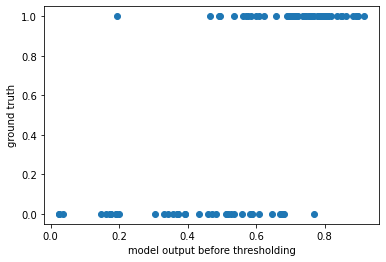

In [27]:
import matplotlib.pyplot as plt

_, a_s = nn.forward_propagation(X)

plt.scatter(a_s[-1],y)
plt.ylabel('ground truth')

plt.xlabel('model output before thresholding')
plt.show()

show classification accuracy after thresholding

In [28]:
thresh = 0.5
preds = np.where(a_s[-1] > 0.5, 1, 0)
print((preds == y).mean())

0.8


# lab6 - 3 : Multi Layer Deep Neural Network using Keras

import keras and get mnist data

In [29]:
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


show mnist data

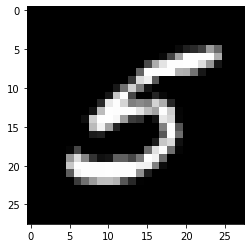

5


In [30]:
import numpy as np
from matplotlib import pyplot as plt

i = 1039

image = X_train[i]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(Y_train[i])

preprocess mnist data

In [31]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

setup model parameters

In [32]:
input_size = 784
batch_size = 100    
hidden_neurons = 400
epochs = 20

build a dnn model (with three dense layers)

In [33]:
model = Sequential()     
model.add(Dense(hidden_neurons, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(classes, input_dim=hidden_neurons))
model.add(Activation('relu'))
model.add(Dense(classes, input_dim=hidden_neurons))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')


train the dnn model

In [34]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
600/600 [==============================] - 1s 1ms/step - loss: 2.2978 - accuracy: 0.1247
Epoch 2/20
600/600 [==============================] - 1s 1ms/step - loss: 2.2056 - accuracy: 0.2082
Epoch 3/20
600/600 [==============================] - 1s 1ms/step - loss: 2.1084 - accuracy: 0.3141
Epoch 4/20
600/600 [==============================] - 1s 1ms/step - loss: 2.0072 - accuracy: 0.4043
Epoch 5/20
600/600 [==============================] - 1s 1ms/step - loss: 1.9122 - accuracy: 0.4669
Epoch 6/20
600/600 [==============================] - 1s 1ms/step - loss: 1.8264 - accuracy: 0.5081
Epoch 7/20
600/600 [==============================] - 1s 1ms/step - loss: 1.7437 - accuracy: 0.5412
Epoch 8/20
600/600 [==============================] - 1s 1ms/step - loss: 1.6671 - accuracy: 0.5711
Epoch 9/20
600/600 [==============================] - 1s 1ms/step - loss: 1.5993 - accuracy: 0.5931
Epoch 10/20
600/600 [==============================] - 1s 1ms/step - loss: 1.5384 - accuracy: 0.6115

evaluate the model with test data

In [35]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])

313/313 [==============================] - 0s 405us/step - loss: 1.1088 - accuracy: 0.7057

Test accuracy: 0.7056999802589417


print confusion matrix

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(Y_test,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[ 950    0    1    0    5    0   22    1    1    0]
 [   0 1072   42    7    5    0    3    0    6    0]
 [  59   15  837   33   42    0   17   14   15    0]
 [  31    2   24  910   20    0    2   19    2    0]
 [   3    0    6    1  930    8   28    0    1    5]
 [ 107    5   37  200  417   56   24   17   25    4]
 [  24    2   15    0   52    0  856    0    9    0]
 [  30   28   34   22   16    6    6  878    3    5]
 [  53   16   28  116  323    7   11   10  410    0]
 [  34    6    5   27  449  216    4  110    0  158]]


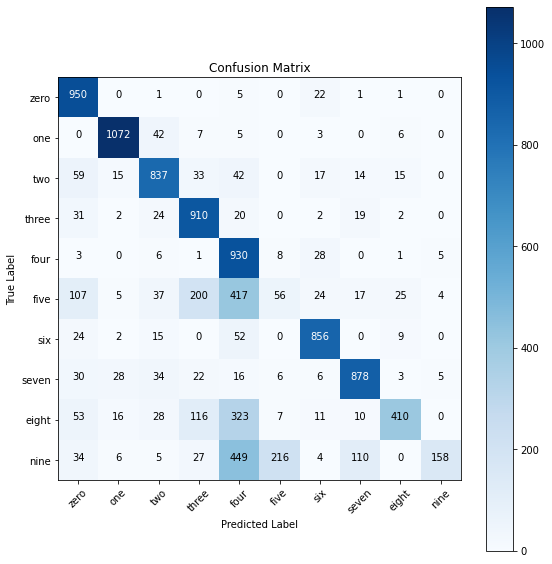

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_gt = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'], rotation=45)
plt.yticks(tick_marks, ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
